In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,SimpleRNN,Dense
import numpy as np
from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.keras.datasets import mnist
(X_train,Y_train_labels),(X_test,Y_test_labels) = mnist.load_data()

In [3]:
labels_mat = np.eye(10)
X_train = X_train/255
X_test = X_test/255
Y_train = labels_mat[Y_train_labels]
Y_test = labels_mat[Y_test_labels]
print(X_train.shape,X_train.dtype)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28) float64
(60000, 10)
(10000, 28, 28)
(10000, 10)


In [4]:
RNN_model = Sequential()
RNN_model.add(SimpleRNN(
    100,
    input_shape=(28,28),
))
RNN_model.add(Dense(10))
#RNN_model.add(Activation("softmax"))

RNN_model.compile(
    optimizer=Adam(0.001),
    loss=tf.losses.softmax_cross_entropy,
    metrics=['accuracy']
)

layers = RNN_model.layers
for i,layer in enumerate(layers):
    print("[{}]:layer {} shape = {}".format(i,layer.name,layer.output.shape))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
[0]:layer simple_rnn shape = (?, 100)
[1]:layer dense shape = (?, 10)


In [5]:
RNN_model.fit(X_train,Y_train,64,8)

Epoch 1/8
60000/60000 [==============================] - 18s 297us/sample - loss: 0.4360 - acc: 0.8690
Epoch 2/8
60000/60000 [==============================] - 17s 289us/sample - loss: 0.2112 - acc: 0.9380
Epoch 3/8
60000/60000 [==============================] - 17s 286us/sample - loss: 0.1716 - acc: 0.9510
Epoch 4/8
60000/60000 [==============================] - 17s 290us/sample - loss: 0.1476 - acc: 0.9575
Epoch 5/8
60000/60000 [==============================] - 17s 288us/sample - loss: 0.1418 - acc: 0.9592
Epoch 6/8
60000/60000 [==============================] - 17s 289us/sample - loss: 0.1203 - acc: 0.9653
Epoch 7/8
60000/60000 [==============================] - 17s 289us/sample - loss: 0.1180 - acc: 0.9666
Epoch 8/8
60000/60000 [==============================] - 17s 291us/sample - loss: 0.1132 - acc: 0.9676


In [6]:
loss,acc = RNN_model.evaluate(X_test,Y_test)

10000/10000 [==============================] - 4s 425us/sample - loss: 0.1193 - acc: 0.9658


In [7]:
def image_compose(datas,rows,cols,weight,height):
    rows_data=[]    
    for y in range(0, rows):
        one_rows_data = []
        for x in range(0, cols):
            image_data = datas[y*cols+x]
            data_w = image_data.shape[1]
            data_h = image_data.shape[0]
            if data_w != weight or data_h !=height:
                new_data = np.zeros((height,weight))
                new_data[0:data_h,0:data_w] = image_data
                image_data = new_data
            one_rows_data.append(image_data)
        rows_data.append(np.concatenate(one_rows_data,axis=1))
    data = np.concatenate(rows_data,axis=0)
    return data

Accuracy =  0.98


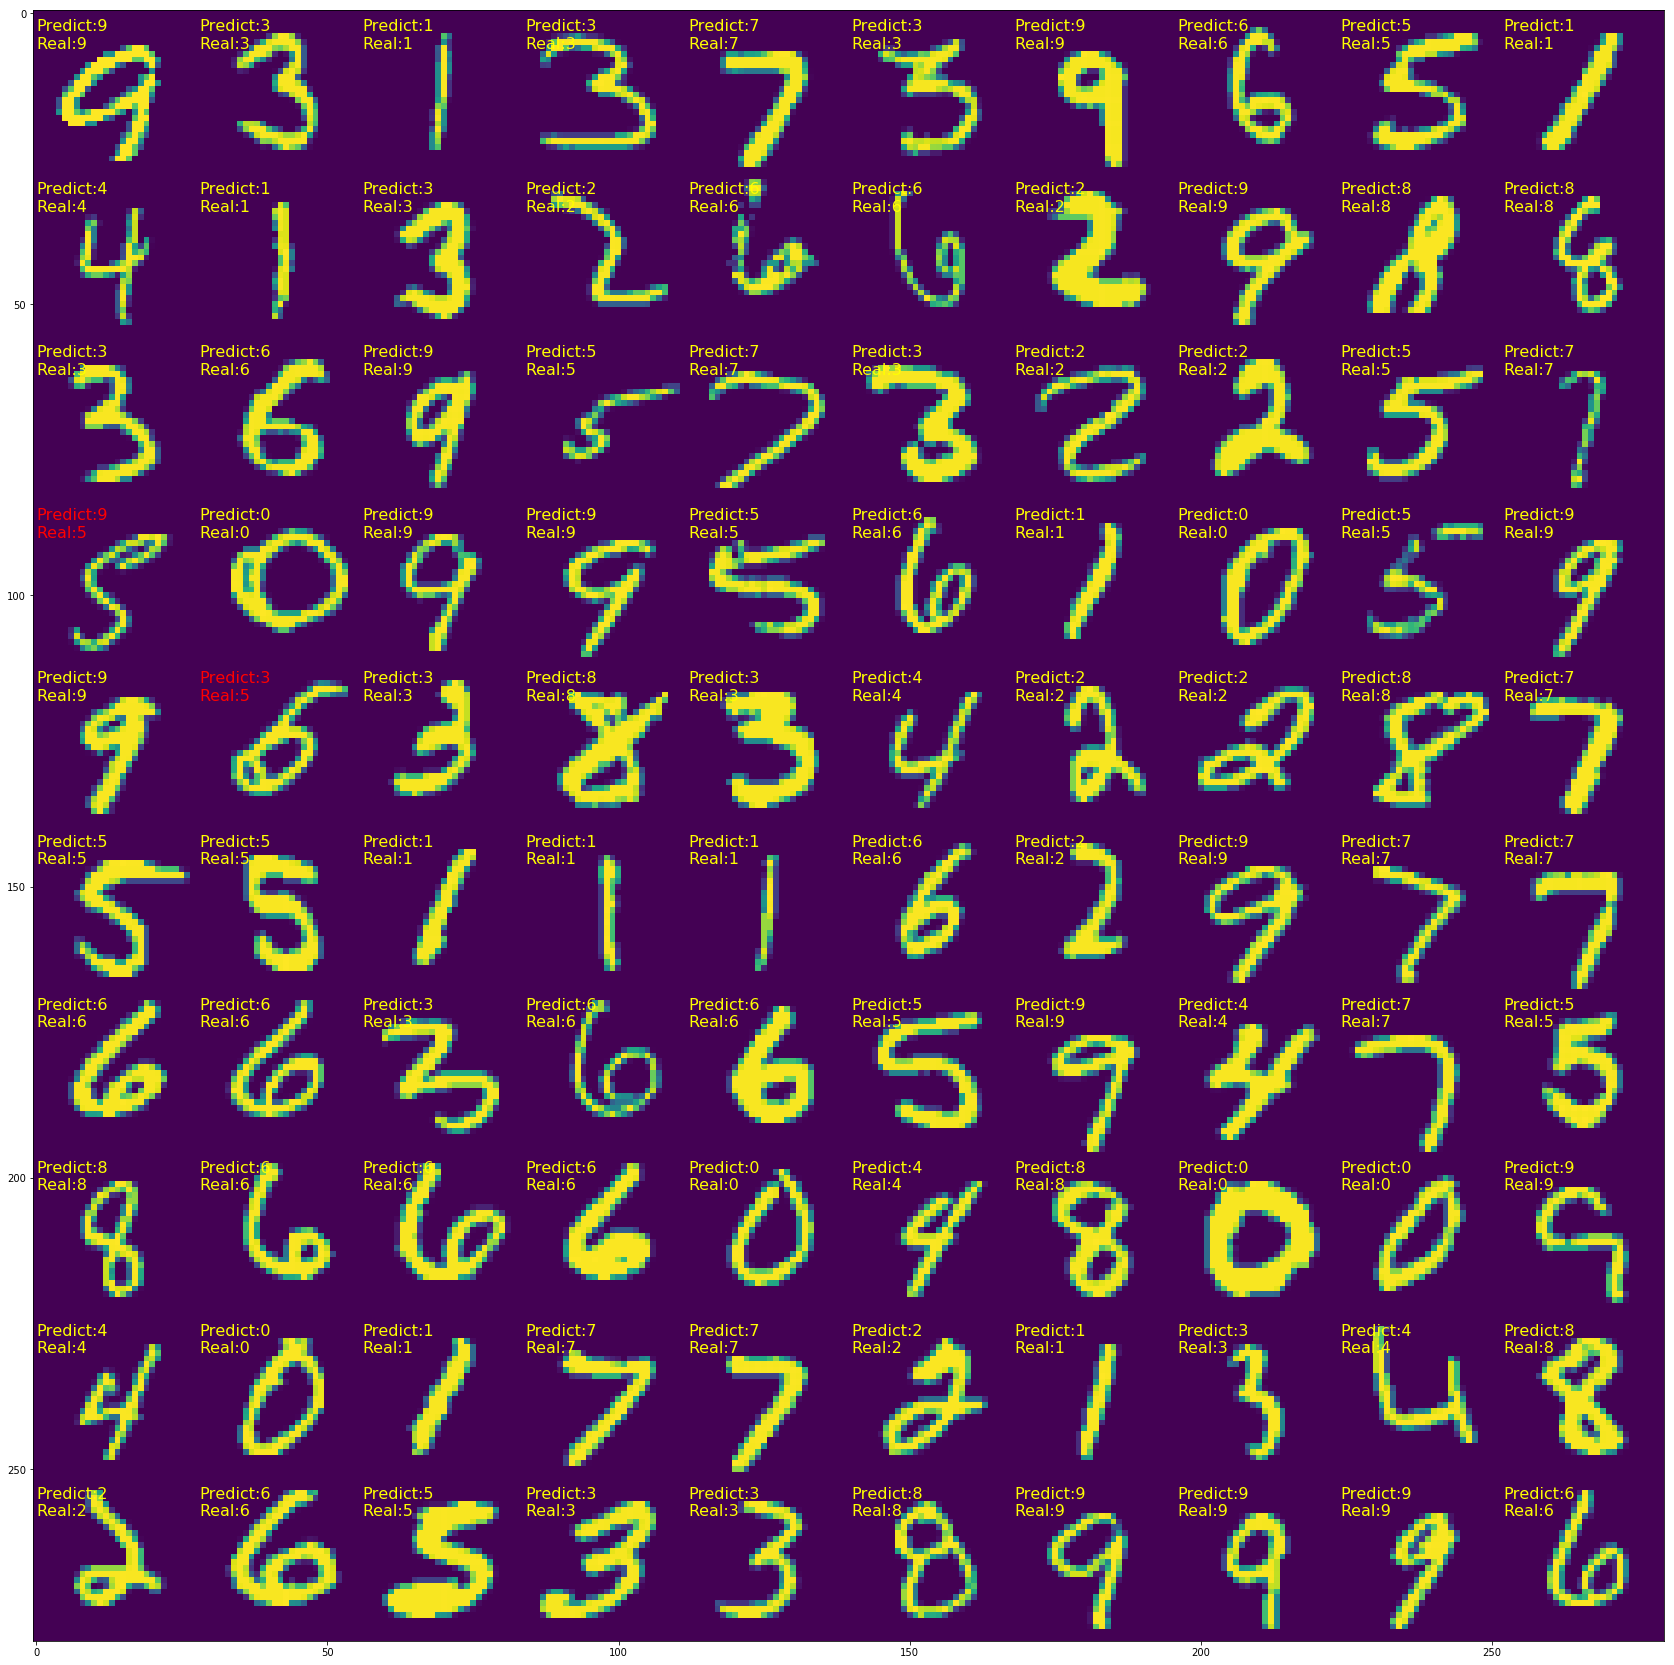

In [9]:
import matplotlib.pyplot as plt
SAMPLE_NUM = 100
ROW_NUM = 10
COL_NUM = int(SAMPLE_NUM/ROW_NUM)
CELL_WIDTH = 28
CELL_HEIGHT = 28

test_lens = X_test.shape[0]
nsd = np.random.RandomState(2019)
index_samples = nsd.choice(test_lens,SAMPLE_NUM,replace=False)
X_sample = X_test[index_samples]
X_sample_image = X_sample.reshape((-1,CELL_WIDTH,CELL_HEIGHT))
Y_sample = Y_test[index_samples]

images = image_compose(X_sample_image,ROW_NUM,COL_NUM,CELL_WIDTH,CELL_HEIGHT)
plt.figure(figsize=(30,30))
plt.imshow(images)

Y_sample_predict = RNN_model.predict(X_sample)
sample_predicts = np.argmax(Y_sample_predict,axis=1)
sample_labels = np.argmax(Y_sample,axis=1)

result_v = sample_predicts == sample_labels
accuracy = np.count_nonzero(result_v)/ len(result_v)
print("Accuracy = ",accuracy)

for row in range(ROW_NUM):
    for col in range(COL_NUM):
        index = row * COL_NUM +col
        pre = sample_predicts[index]
        label = sample_labels[index]
        label_color = "yellow" if result_v[row*COL_NUM+col] else "red"
        plt.text(col*CELL_WIDTH,row*CELL_HEIGHT+6,"Predict:{}\nReal:{}".format(pre,label),color=label_color,fontsize=16)
plt.show()